In [1]:
!pip install torch==2.2.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 58.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [2]:
import torch
print(torch.__version__)

2.2.1+cu121


In [3]:
!pip install torch_geometric
!pip install pyg_lib torch_scatter torch_sparse torch_cluster torch_spline_conv -f https://data.pyg.org/whl/torch-2.2.1+cu121.html

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 25.5 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.2.1+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 57.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 943.4/943.4 kB 14.6 MB/s eta 0:00:00


In [4]:
from torch.optim import SparseAdam

In [5]:
from torch_geometric.datasets import Actor

data = Actor('../data')

Processing...
Done!


In [6]:
from torch_geometric.nn import Node2Vec
from tqdm import tqdm

In [81]:
model = Node2Vec(data.edge_index, embedding_dim=10, walk_length=30,
                          context_size=10, walks_per_node=20, num_negative_samples=1,
                          p=200, q=1, sparse=True)


In [82]:
def train(model, epochs=5, batch_size=32, lr=0.01, device='cpu'):
    model = model.to(device)

    loader = model.loader(batch_size=batch_size, shuffle=True, num_workers=1)

    optimizer = SparseAdam(list(model.parameters()), lr=lr)

    model.train()

    for epoch in range(epochs):
        train_loss = 0

        for pos_rw, neg_rw in tqdm(loader):
            optimizer.zero_grad()

            loss = model.loss(pos_rw.to(device), neg_rw.to(device))
            loss.backward()

            optimizer.step()

            train_loss += loss.item()

        train_loss = train_loss / len(loader)

        print(f'Epoch: {epoch:02d}, Loss: {train_loss:.4f}')

In [83]:
train(model, epochs=20, batch_size=16, lr=0.002, device='cuda')

100%|██████████| 475/475 [00:06<00:00, 73.39it/s] 


Epoch: 00, Loss: 1.7395


100%|██████████| 475/475 [00:03<00:00, 137.01it/s]


Epoch: 01, Loss: 1.1661


100%|██████████| 475/475 [00:03<00:00, 141.10it/s]


Epoch: 02, Loss: 0.9620


100%|██████████| 475/475 [00:04<00:00, 106.50it/s]


Epoch: 03, Loss: 0.9010


100%|██████████| 475/475 [00:03<00:00, 137.31it/s]


Epoch: 04, Loss: 0.8770


100%|██████████| 475/475 [00:03<00:00, 141.82it/s]


Epoch: 05, Loss: 0.8645


100%|██████████| 475/475 [00:03<00:00, 128.24it/s]


Epoch: 06, Loss: 0.8563


100%|██████████| 475/475 [00:03<00:00, 120.06it/s]


Epoch: 07, Loss: 0.8504


100%|██████████| 475/475 [00:03<00:00, 140.36it/s]


Epoch: 08, Loss: 0.8455


100%|██████████| 475/475 [00:03<00:00, 139.13it/s]


Epoch: 09, Loss: 0.8420


100%|██████████| 475/475 [00:04<00:00, 109.80it/s]


Epoch: 10, Loss: 0.8397


100%|██████████| 475/475 [00:03<00:00, 139.46it/s]


Epoch: 11, Loss: 0.8374


100%|██████████| 475/475 [00:03<00:00, 139.07it/s]


Epoch: 12, Loss: 0.8361


100%|██████████| 475/475 [00:03<00:00, 136.38it/s]


Epoch: 13, Loss: 0.8344


100%|██████████| 475/475 [00:04<00:00, 113.97it/s]


Epoch: 14, Loss: 0.8337


100%|██████████| 475/475 [00:03<00:00, 140.43it/s]


Epoch: 15, Loss: 0.8330


100%|██████████| 475/475 [00:03<00:00, 141.04it/s]


Epoch: 16, Loss: 0.8323


100%|██████████| 475/475 [00:04<00:00, 116.19it/s]


Epoch: 17, Loss: 0.8315


100%|██████████| 475/475 [00:03<00:00, 135.81it/s]


Epoch: 18, Loss: 0.8313


100%|██████████| 475/475 [00:03<00:00, 139.75it/s]

Epoch: 19, Loss: 0.8307


In [84]:
model

Node2Vec(7600, 10)

In [85]:
node_emb = model().detach().cpu().numpy()

In [86]:
node_emb

array([[ 0.04629885, -0.05498737,  0.11541322, ..., -0.22284323,
         0.10740218,  0.08241738],
       [-0.01434849, -0.10404146,  0.08028759, ..., -0.34215766,
         0.11663642, -0.19162203],
       [-0.14556968, -0.08996943,  0.05157266, ..., -0.30136305,
        -0.15064602,  0.03573892],
       ...,
       [-0.03287256, -0.05137092,  0.13809165, ..., -0.20332474,
         0.06291194, -0.187052  ],
       [ 0.03893395, -0.06932341,  0.1499165 , ..., -0.10426366,
         0.05852001, -0.00993495],
       [ 0.21404684,  0.19677635, -0.02509698, ..., -0.04730411,
         0.0686641 , -0.0839569 ]], dtype=float32)

In [87]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)

In [88]:
node_2d = tsne.fit_transform(node_emb)

In [89]:
node_2d

array([[ 61.823982,  11.558055],
       [ 12.705756, -28.14754 ],
       [  3.302167, -56.297367],
       ...,
       [ 12.984957, -23.9238  ],
       [ 43.521866,   8.954464],
       [-19.674358,  41.383854]], dtype=float32)

In [90]:
import matplotlib.pyplot as plt

In [91]:
labels = data.y.detach().cpu().numpy()

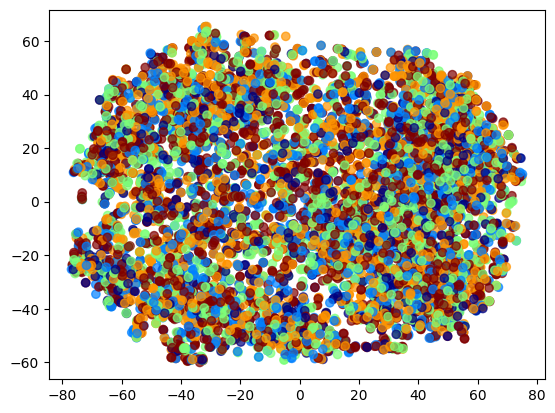

In [92]:
plt.scatter(node_2d[:, 0], node_2d[:, 1],
            c=labels, cmap='jet', alpha=0.7)

# Задача 1

In [93]:
data.x

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [94]:
from sklearn.ensemble import RandomForestClassifier
shuma = RandomForestClassifier(n_estimators=125, random_state=42)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.x, labels)
shuma.fit(x_train, y_train)

RandomForestClassifier(n_estimators=125, random_state=42)

In [95]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
pred = shuma.predict(x_test)
print(accuracy_score(pred, y_test))
print(precision_score(pred, y_test, average='macro'))
print(f1_score(pred, y_test, average='macro'))
print(recall_score(pred, y_test, average='macro'))

0.33842105263157896
0.3367683075311018
0.329357188078834
0.33229900408659596


# Задача 2

In [96]:
from sklearn.ensemble import RandomForestClassifier
shuma = RandomForestClassifier(n_estimators=125, random_state=42)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(node_emb, labels)
shuma.fit(x_train, y_train)

RandomForestClassifier(n_estimators=125, random_state=42)

In [97]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
pred = shuma.predict(x_test)
print(accuracy_score(pred, y_test))
print(precision_score(pred, y_test, average='macro'))
print(f1_score(pred, y_test, average='macro'))
print(recall_score(pred, y_test, average='macro'))

0.24157894736842106
0.2062580315793388
0.1936931649176333
0.20359621955731172


Задача 3

In [98]:
combined = torch.cat((data.x, torch.tensor(node_emb)), dim=1)

In [99]:
from sklearn.ensemble import RandomForestClassifier
shuma = RandomForestClassifier(n_estimators=125, random_state=42)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(combined, labels)
shuma.fit(x_train, y_train)

RandomForestClassifier(n_estimators=125, random_state=42)

In [100]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
pred = shuma.predict(x_test)
print(accuracy_score(pred, y_test))
print(precision_score(pred, y_test, average='macro'))
print(f1_score(pred, y_test, average='macro'))
print(recall_score(pred, y_test, average='macro'))

0.34210526315789475
0.3164013255279758
0.31886724729627247
0.32327806607215837


Во зависност од параметрите, различни методи се најдобри. Со поголеми димензии на ембединзи се добиваше дека најдобро е само со карактеристики, а со помали димензии најдобро е со карактеристики и вгнездувања заедно.